In [6]:
import torch
import numpy as np
# Kích thước ảnh và số lượng ảnh
h = 32
w = 32
num_images_per_row = 4
num_rows = 3

# Tạo các tensor ví dụ
h1 = torch.randn(1, h, w, 3)
h2 = torch.randn(1, h, w, 3)
h3 = torch.randn(1, h, w, 3)
h4 = torch.randn(1, h, 30, 3) # tile cuoi cua 1 hang

h5 = torch.randn(1, h, w, 3)
h6 = torch.randn(1, h, w, 3)
h7 = torch.randn(1, h, w, 3)
h8 = torch.randn(1, h, 30, 3) # tile cuoi cua 1 hang

# cac tile cuoi cua cot
h9 = torch.randn(1, 28, w, 3)
h10 = torch.randn(1, 28, w, 3)
h11 = torch.randn(1, 28, w, 3)
h12 = torch.randn(1, 28, 30, 3) # tile cuoi cua 1 hang

# Tạo danh sách các tensor theo hàng
row1 = torch.cat([h1, h2, h3, h4], dim=2) # ([1, 32, 126, 3])
row2 = torch.cat([h5, h6, h7, h8], dim=2) # ([1, 32, 126, 3])
row3 = torch.cat([h9, h10, h11, h12], dim=2) # ([1, 28, 128, 3])

image = torch.cat([row1, row2, row3], dim=1)  

print(image.shape)  #([1, 96, 128, 3])


torch.Size([1, 92, 126, 3])


In [7]:
# ! pip install netCDF4 

Keys: dict_keys(['time', 'lat', 'lon', 'sm', 'sm_uncertainty', 'flag', 'freqbandID', 'dnflag', 'mode', 'sensor', 't0'])
Latitude shape: (720,)
Longitude shape: (1440,)


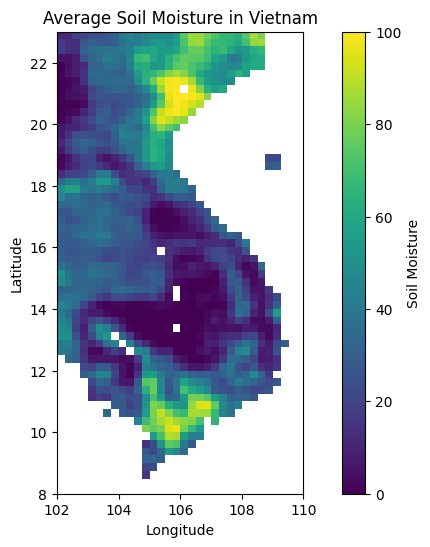

In [35]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

# Mở tệp .nc
dataset = nc.Dataset('D:/New folder/C3S-SOILMOISTURE-L3S-SSMS-ACTIVE-DAILY-20240406000000-ICDR-v202212.0.0.nc')

# Liệt kê các biến trong tệp
print('Keys:', dataset.variables.keys())

# Giả sử biến tọa độ là 'lat' và 'lon'
latitudes = dataset.variables['lat'][:]
longitudes = dataset.variables['lon'][:]

# Kiểm tra hình dạng của các biến tọa độ
print('Latitude shape:', latitudes.shape)
print('Longitude shape:', longitudes.shape)

# Xác định phạm vi tọa độ của Việt Nam
lat_min, lat_max = 8, 23
lon_min, lon_max = 102, 110

# Tìm chỉ số tương ứng với tọa độ Việt Nam
lat_indices = np.where((latitudes >= lat_min) & (latitudes <= lat_max))[0]
lon_indices = np.where((longitudes >= lon_min) & (longitudes <= lon_max))[0]

# Truy cập một biến cụ thể (ví dụ: 'sm' - soil moisture) tại vị trí Việt Nam
soil_moisture = dataset.variables['sm'][:, lat_indices[0]:lat_indices[-1]+1, lon_indices[0]:lon_indices[-1]+1]

# Đóng tệp
dataset.close()

# Tạo hình ảnh trung bình từ tất cả các lát thời gian (time slices)
soil_moisture_mean = np.mean(soil_moisture, axis=0)

# Trực quan hóa dữ liệu
plt.figure(figsize=(10, 6))
plt.imshow(soil_moisture_mean, extent=[lon_min, lon_max, lat_min, lat_max], cmap='viridis')
plt.colorbar(label='Soil Moisture')
plt.title('Average Soil Moisture in Vietnam')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
